In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../python-machine-learning-book-2nd-edition/code/ch10/housing.data.txt", header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cols = "LSTAT INDUS NOX RM MEDV".split()

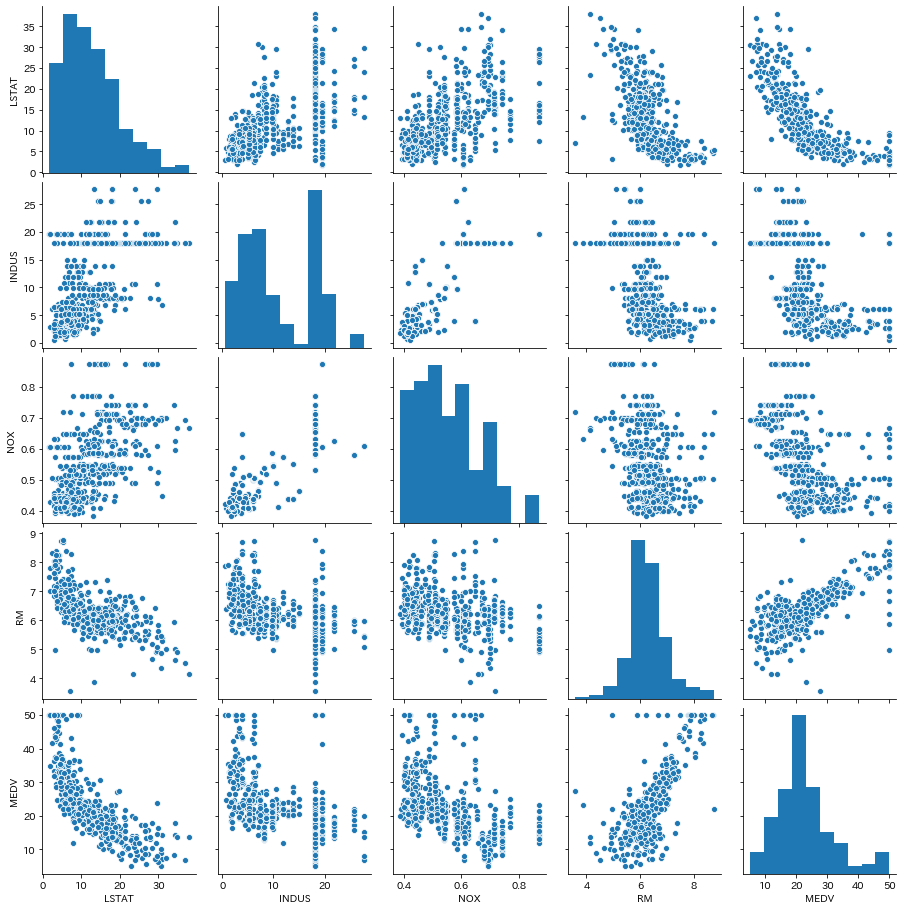

In [10]:
sns.pairplot(df[cols], height=2.5)

In [11]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)

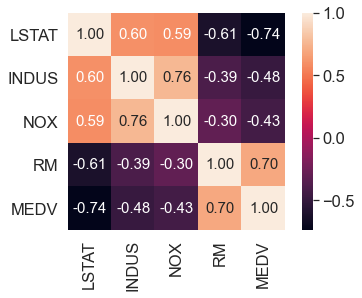

In [12]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

In [13]:
from src.linear_regression_gd import LinearRegressionGD

In [14]:
X = df[['RM']].values
y = df['MEDV'].values

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [18]:
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [19]:
lr = LinearRegressionGD()

In [20]:
lr.fit(X_std, y_std)

Text(0.5, 0, 'Epoch')

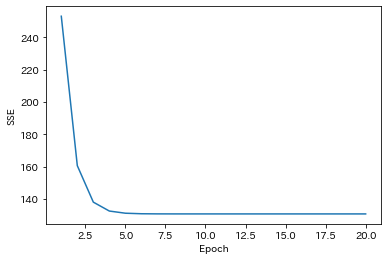

In [24]:
sns.reset_orig()
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')

In [26]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

Text(0, 0.5, 'Price in $1000s [MEDV] (standarized)')

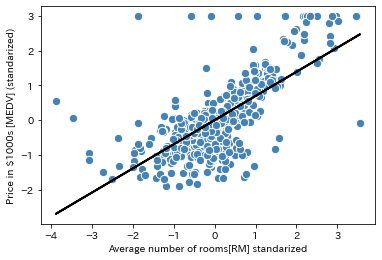

In [28]:
lin_regplot(X_std, y_std, lr)
plt.xlabel("Average number of rooms[RM] standarized")
plt.ylabel('Price in $1000s [MEDV] (standarized)')

In [40]:
num_rooms_std = sc_x.transform(np.array([5.0]).reshape(1,-1))

In [41]:
num_rooms_std

array([[-1.83016553]])

In [42]:
price_std = lr.predict(num_rooms_std)

In [52]:
price_std.item()

-1.272622849667099

In [54]:
print(f"Price in $1000s: {sc_y.inverse_transform(price_std).item():.3f}")

Price in $1000s: 10.840


In [55]:
print(f"Slope: {lr.w_[1]:.3f}")

Slope: 0.695


In [56]:
print(f"Intercept {lr.w_[0]:.3f}")

Intercept -0.000


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
slr = LinearRegression()

In [59]:
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print(f"Slope: {slr.coef_[0]:.3f}")

Slope: 9.102


In [62]:
print(f"Slope: {slr.intercept_:.3f}")

Slope: -34.671


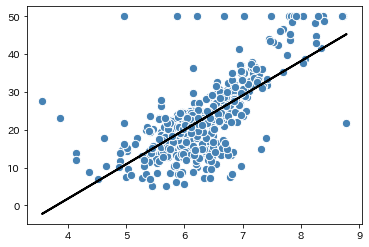

In [63]:
lin_regplot(X, y, slr)

In [64]:
from sklearn.linear_model import RANSACRegressor

In [67]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0)

In [68]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [69]:
inlier_mask = ransac.inlier_mask_

In [70]:
outlier_mask = np.logical_not(inlier_mask)

In [71]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

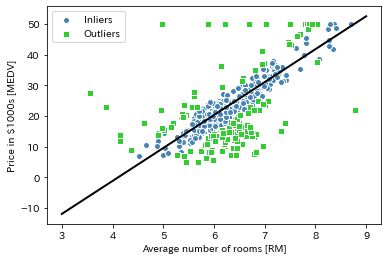

In [73]:
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend()

In [74]:
ransac.estimator_.coef_

array([10.73450881])

In [76]:
ransac.estimator_.intercept_

-44.08906428639813

In [77]:
from sklearn.model_selection import train_test_split

In [109]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [111]:
X.shape

(506, 13)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [113]:
slr = LinearRegression()

In [114]:
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
X_train.shape

(354, 13)

In [116]:
y_train.shape

(354,)

In [117]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

(-10, 50)

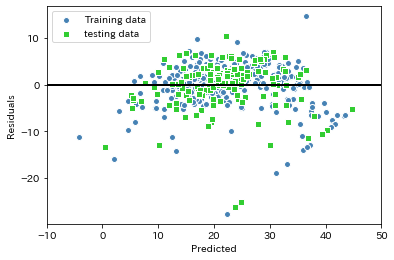

In [121]:
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred-y_test, c='limegreen', marker='s', edgecolor='white', label='testing data')
plt.legend()
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim(-10, 50)

In [122]:
from sklearn.metrics import mean_squared_error

In [124]:
mean_squared_error(y_train, y_train_pred)

19.958219814238046

In [125]:
mean_squared_error(y_test, y_test_pred)

27.195965766883354

In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y_train, y_train_pred)

0.7645451026942549

In [128]:
r2_score(y_test, y_test_pred)

0.6733825506400177

In [129]:
from sklearn.linear_model import Ridge

In [130]:
ridge = Ridge(alpha=1.0)

In [131]:
from sklearn.linear_model import Lasso

In [133]:
lasso = Lasso(alpha=1.0)

In [135]:
from sklearn.linear_model import ElasticNet

In [136]:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [137]:
from sklearn.preprocessing import PolynomialFeatures

In [144]:
X = np.array([258., 270., 294., 320, 342, 368, 396, 446, 480, 586]).reshape(-1, 1)
y = np.array([236.4, 234, 252, 298, 314, 342, 360, 368, 391, 390])

In [141]:
lr = LinearRegression()
pr = LinearRegression()

In [142]:
quadratic = PolynomialFeatures(degree=2)

In [145]:
X_quad = quadratic.fit_transform(X)

In [146]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
X_fit  =np.arange(250, 600, 10)[:, np.newaxis]

In [150]:
np.arange(250, 600, 10).shape

(35,)

In [148]:
y_lin_fit = lr.predict(X_fit)

In [153]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

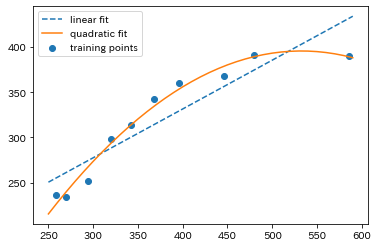

In [155]:
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend()

In [157]:
y_lin_pred = lr.predict(X)

In [158]:
y_quad_pred = pr.predict(X_quad)

In [159]:
mean_squared_error(y, y_lin_pred)

573.7542890271206

In [160]:
mean_squared_error(y, y_quad_pred)

62.092892242338245

In [161]:
r2_score(y, y_lin_pred)

0.8304340439237649

In [162]:
r2_score(y, y_quad_pred)

0.981649216676944

In [168]:
X = df[['LSTAT']].values

In [164]:
y = df['MEDV']

In [170]:
regr = LinearRegression()

In [173]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [174]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [175]:
regr = regr.fit(X, y)

In [176]:
y_lin_fit = regr.predict(X_fit)

In [177]:
linear_r2 = r2_score(y, regr.predict(X))

In [178]:
regr = regr.fit(X_quad, y)

In [179]:
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))

In [181]:
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [182]:
regr = regr.fit(X_cubic, y)

In [183]:
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))

In [184]:
cubic_r2 = r2_score(y, regr.predict(X_cubic))

Text(0, 0.5, 'Price in $1000s [MEDV]')

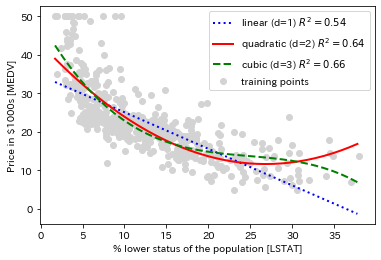

In [186]:
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label=f'linear (d=1) $R^2={linear_r2:.2f}$', color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label=f'quadratic (d=2) $R^2={quadratic_r2:.2f}$', color='red', linestyle='-', lw=2)
plt.plot(X_fit, y_cubic_fit, label=f'cubic (d=3) $R^2={cubic_r2:.2f}$', color='green', linestyle='--', lw=2)
plt.legend()
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

In [187]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

In [188]:
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

In [189]:
regr = regr.fit(X_log, y_sqrt)

In [190]:
y_lin_fit = regr.predict(X_fit)

In [191]:
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

Text(0, 0.5, '$\\sqrt{Price in \\$1000s [MEDV]}$')

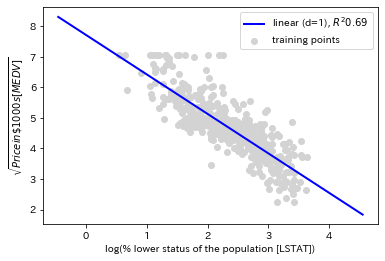

In [195]:
plt.scatter(X_log, y_sqrt, label="training points", color='lightgray')
plt.plot(X_fit, y_lin_fit, label=f"linear (d=1), $R^2 {linear_r2:.2f}$", color='blue', lw=2)
plt.legend()
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price in \$1000s [MEDV]}$')

In [196]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)

In [197]:
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [198]:
sort_idx = X.flatten().argsort()

No handles with labels found to put in legend.


Text(0, 0.5, 'Price in $1000s [MEDV]')

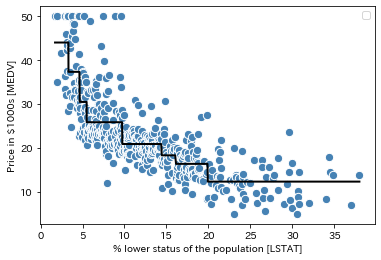

In [200]:
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.legend()
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

In [202]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

In [215]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [216]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print(f"{mean_squared_error(y_train, y_train_pred):.3f}, {mean_squared_error(y_test, y_test_pred):.3f}")

1.641, 11.056


In [217]:
print(f"{r2_score(y_train, y_train_pred):.3f}, {r2_score(y_test, y_test_pred):.3f}")

0.979, 0.878


(-10, 50)

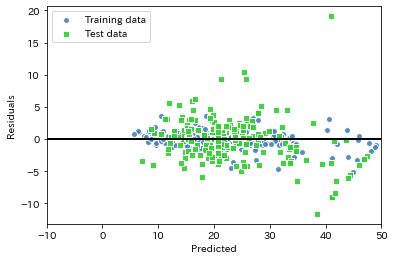

In [218]:
plt.scatter(y_train_pred, y_train_pred-y_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=.9, label="Training data")
plt.scatter(y_test_pred, y_test_pred-y_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=.9, label="Test data")
plt.legend()
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])